In [2]:
#imports
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from math import sqrt

#pandas profiling
from pandas_profiling import ProfileReport

#sklearn stuff
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, SVC

<b>Data Import</b>

In [4]:
#data import
credit = pd.read_csv('credit.csv', skiprows=1)

<b>Preprocessing</b>

In [5]:
#Rename col
credit['default'] = credit['default payment next month']
#drop unneeded cols
credit = credit.drop(['ID', 'default payment next month'], axis=1)
#drop duplicates
credit = credit.drop_duplicates()
#check for nulls
nulls = credit.isnull().sum()
nulls

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [6]:
credit.dtypes

LIMIT_BAL     int64
SEX          object
EDUCATION    object
MARRIAGE      int64
AGE           int64
PAY_0         int64
PAY_2         int64
PAY_3         int64
PAY_4         int64
PAY_5         int64
PAY_6         int64
BILL_AMT1     int64
BILL_AMT2     int64
BILL_AMT3     int64
BILL_AMT4     int64
BILL_AMT5     int64
BILL_AMT6     int64
PAY_AMT1      int64
PAY_AMT2      int64
PAY_AMT3      int64
PAY_AMT4      int64
PAY_AMT5      int64
PAY_AMT6      int64
default      object
dtype: object

In [7]:
credit['SEX'].describe()

count      29965
unique         2
top       female
freq       18091
Name: SEX, dtype: object

In [8]:
#Encode as needed
le = LabelEncoder()
le.fit(credit['SEX'])
credit['SEX'] = le.transform(credit['SEX'])
#credit['SEX']

In [9]:
credit['default'].describe()

count           29965
unique              2
top       not default
freq            23335
Name: default, dtype: object

In [10]:
#Encode as needed
le = LabelEncoder()
le.fit(credit['default'])
credit['default'] = le.transform(credit['default'])
#credit['default']

In [11]:
#re-check dtypes
credit.dtypes

LIMIT_BAL     int64
SEX           int32
EDUCATION    object
MARRIAGE      int64
AGE           int64
PAY_0         int64
PAY_2         int64
PAY_3         int64
PAY_4         int64
PAY_5         int64
PAY_6         int64
BILL_AMT1     int64
BILL_AMT2     int64
BILL_AMT3     int64
BILL_AMT4     int64
BILL_AMT5     int64
BILL_AMT6     int64
PAY_AMT1      int64
PAY_AMT2      int64
PAY_AMT3      int64
PAY_AMT4      int64
PAY_AMT5      int64
PAY_AMT6      int64
default       int32
dtype: object

In [12]:
#one-hot encode objects
credit = pd.get_dummies(credit)

In [13]:
credit.dtypes

LIMIT_BAL                    int64
SEX                          int32
MARRIAGE                     int64
AGE                          int64
PAY_0                        int64
PAY_2                        int64
PAY_3                        int64
PAY_4                        int64
PAY_5                        int64
PAY_6                        int64
BILL_AMT1                    int64
BILL_AMT2                    int64
BILL_AMT3                    int64
BILL_AMT4                    int64
BILL_AMT5                    int64
BILL_AMT6                    int64
PAY_AMT1                     int64
PAY_AMT2                     int64
PAY_AMT3                     int64
PAY_AMT4                     int64
PAY_AMT5                     int64
PAY_AMT6                     int64
default                      int32
EDUCATION_graduate school    uint8
EDUCATION_high school        uint8
EDUCATION_other              uint8
EDUCATION_university         uint8
dtype: object

<b>Descriptive Stats</b>

In [14]:
credit.describe()

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
count,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,...,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000
mean,167442.005006,0.396262,1.551877,35.487969,-0.016753,-0.131854,-0.164392,-0.218922,-0.264509,-0.289438,...,5.927983e+03,5231.688837,4831.617454,4804.897047,5221.498014,0.778742,0.352511,0.164025,0.015618,0.467846
std,129760.135222,0.489128,0.521997,9.219459,1.123492,1.196322,1.195878,1.168175,1.132220,1.149090,...,2.305346e+04,17616.361124,15674.464538,15286.372298,17786.976864,0.415101,0.477760,0.370304,0.123995,0.498973
min,10000.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,0.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,8.500000e+02,390.000000,300.000000,261.000000,131.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,0.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.010000e+03,1804.000000,1500.000000,1500.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,1.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000e+03,4512.000000,4016.000000,4042.000000,4000.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1000000.000000,1.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
#shift pay features for -2
credit['PAY_0'] = credit['PAY_0'].replace(-2,0)
credit['PAY_2'] = credit['PAY_2'].replace(-2,0)
credit['PAY_3'] = credit['PAY_3'].replace(-2,0)
credit['PAY_4'] = credit['PAY_4'].replace(-2,0)
credit['PAY_5'] = credit['PAY_5'].replace(-2,0)
credit['PAY_6'] = credit['PAY_6'].replace(-2,0)

#shift pay features for -1
credit['PAY_0'] = credit['PAY_0'].replace(-1,0)
credit['PAY_2'] = credit['PAY_2'].replace(-1,0)
credit['PAY_3'] = credit['PAY_3'].replace(-1,0)
credit['PAY_4'] = credit['PAY_4'].replace(-1,0)
credit['PAY_5'] = credit['PAY_5'].replace(-1,0)
credit['PAY_6'] = credit['PAY_6'].replace(-1,0)

<b>All numbers - good to go! - Pre-processing complete</b>

<b>Correlation</b>

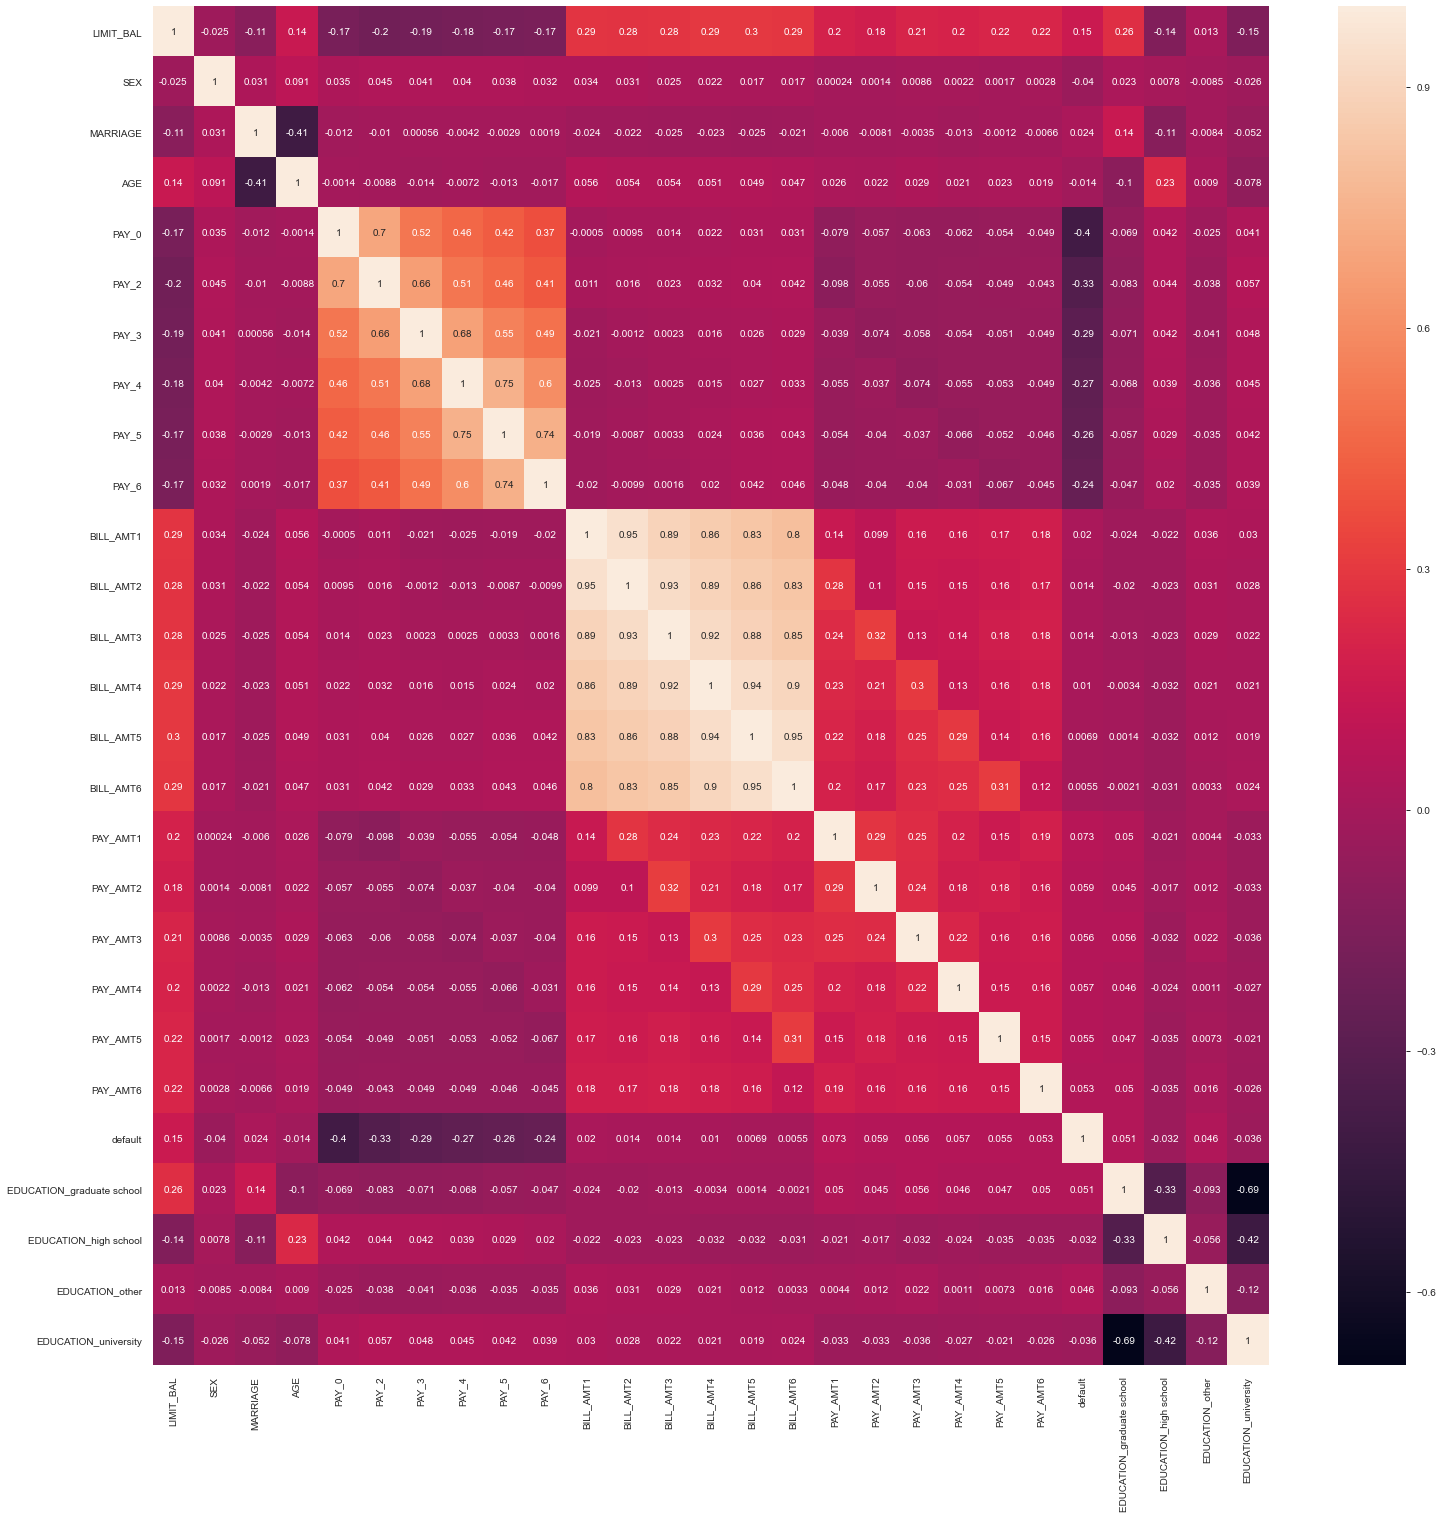

In [16]:
#correlation
credit_corr = credit.corr()
plt.figure(figsize=(25,25))
sn.heatmap(credit_corr, annot=True)
plt.show()

<b>Findings:</b><br>
PAY0 - PAY6, SEX, MARRIAGE and EDUCATION (sans graduate school) have very low correlation to credit limit

<b>Feature Selection via Filtering</b>

In [17]:
#drop unneeded cols
credit = credit.drop(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'MARRIAGE', 'SEX', 'EDUCATION_high school', 'EDUCATION_other', 'EDUCATION_university'], axis=1)
#credit = credit.drop(['MARRIAGE', 'SEX', 'EDUCATION_high school', 'EDUCATION_other', 'EDUCATION_university'], axis=1)

In [18]:
credit.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,EDUCATION_graduate school
0,20000,24,3913,3102,689,0,0,0,0,689,0,0,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,0,0
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,1,0
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,1,0
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,1,0


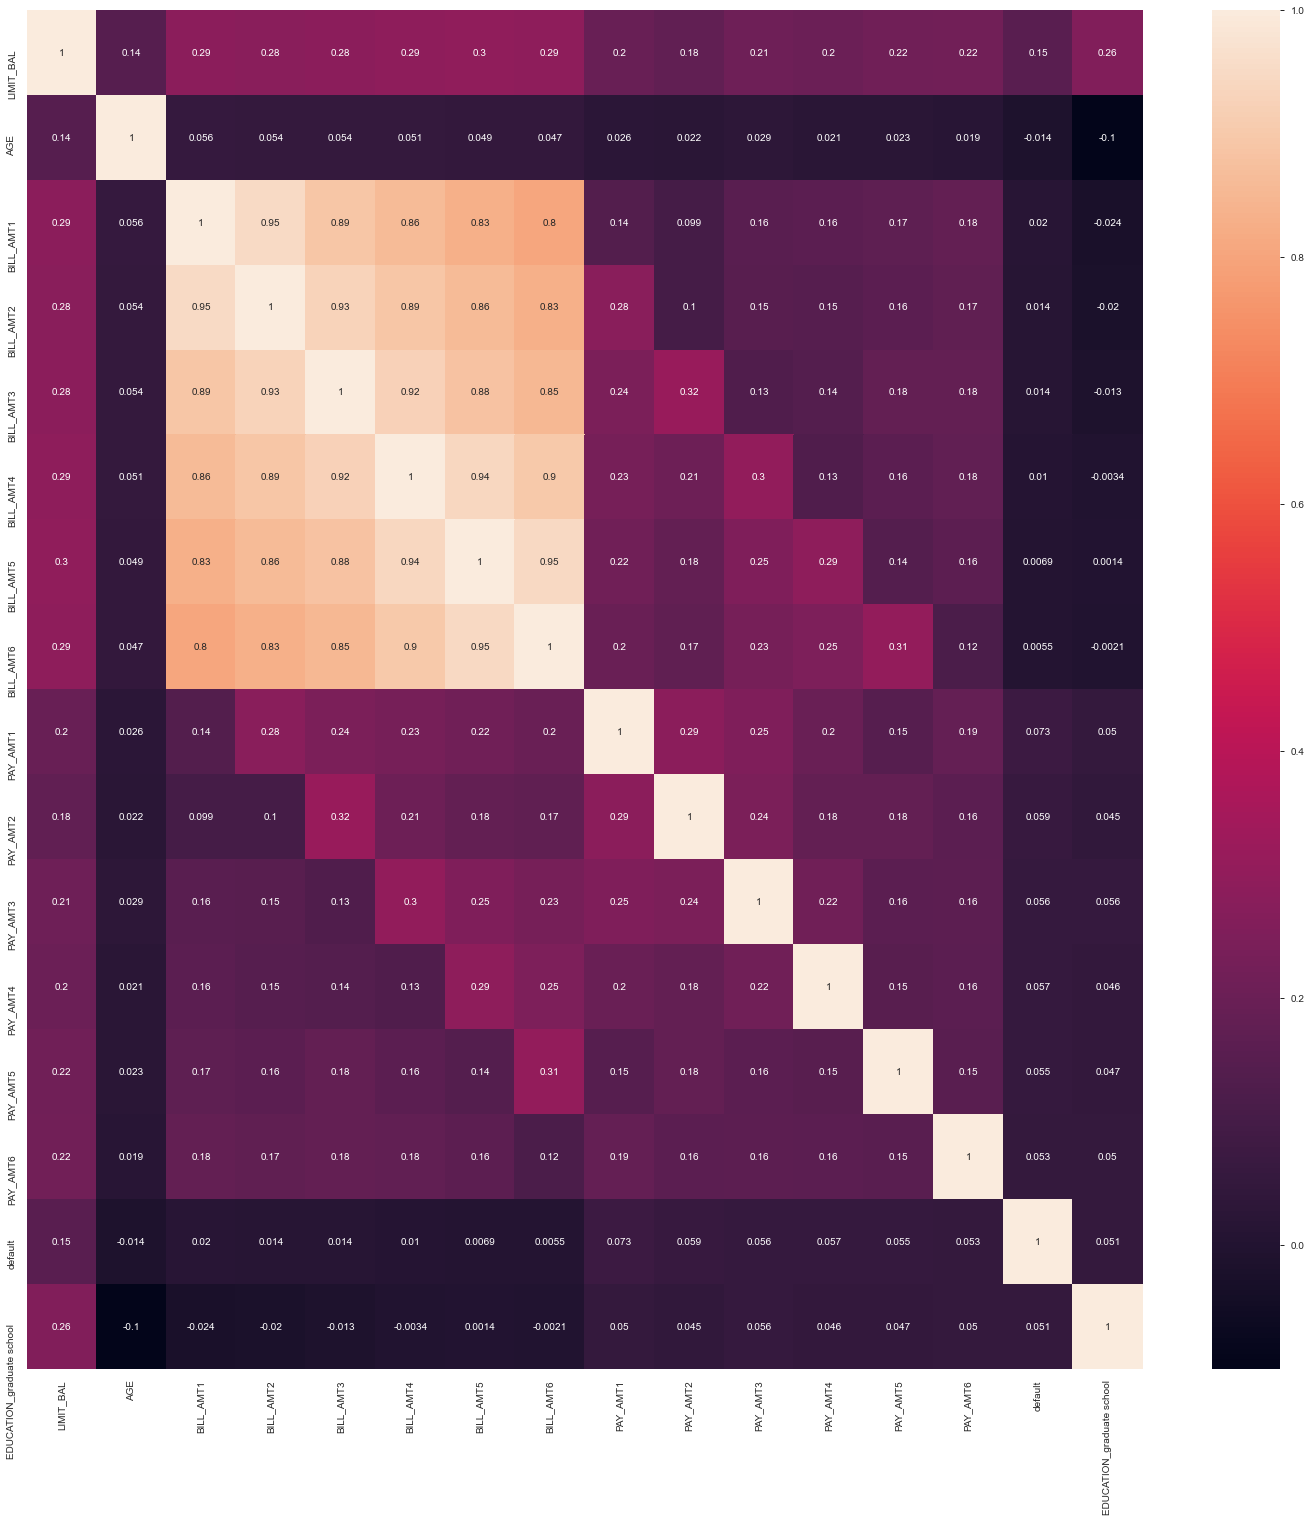

In [19]:
#correlation
credit_corr = credit.corr()
plt.figure(figsize=(25,25))
sn.heatmap(credit_corr, annot=True)
plt.show()

In [20]:
#credit = credit.drop(['AGE', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'], axis=1)

<b>Modelling - Regression</b>

In [21]:
#features
X = credit.iloc[:,1:]
#dep Var
y = credit['LIMIT_BAL']
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 123)

<b>Choosing a model</b>

In [22]:
algos_Class = []
algos_Class.append(('Random Forest', RandomForestRegressor()))
algos_Class.append(('Linear Model', LinearRegression()))
algos_Class.append(('SVR', SVR()))

In [23]:
#Regression
results = []
names = []
for name, model in algos_Class:
        result = cross_val_score(model, X,y, cv=3)
        names.append(name)
        results.append(result)

C:\Users\P00012240\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\P00012240\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\P00012240\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\P00012240\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled fea

In [24]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest 0.40565264357873393
Linear Model 0.24976896060838083
SVR -0.056004555262496


In [25]:
#Modelling
algo = RandomForestRegressor(n_estimators=200)
model = algo.fit(X_train, y_train)

In [26]:
#predictions
preds = model.predict(X_test)
#Assessment
print('R2 Score is: %.3f' % r2_score(y_test, preds))
print('MSE is: %.3f' % mean_squared_error(y_test, preds))
rms = sqrt(mean_squared_error(y_test, preds))
print('RMSE is: %.3f' % rms)

R2 Score is: 0.468
MSE is: 8843675780.603
RMSE is: 94040.820


In [58]:
#create a sample of y_test
y_test_sample = y_test.sample(n=100, random_state=1)

#create a sample of preds, convert it to df first
preds_df = pd.DataFrame(data=preds.flatten())
preds_sample = preds_df.sample(n=100, random_state=1)



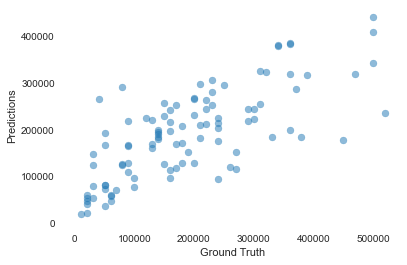

In [62]:
plt.scatter(y_test_sample, preds_sample, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();